### Importing Dependencies

In [1]:
import numpy as np # We are gonna be using a lil linear algebra
from math import log
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from subprocess import check_output
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [2]:
credit_data=pd.read_csv('credit_card.csv')

In [3]:
credit_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
credit_data['Time_in_hours']=credit_data['Time']/3600
credit_data['Log_Amount']=np.log(credit_data['Amount']+1)

Looking into the time variable and looking what were the peak hours of transactions.

In [5]:
plt.hist(data=credit_data,x='Time_in_hours')

(array([ 10510.,  16955.,  38526.,  38550.,  40243.,  10145.,  17161.,
         38951.,  40779.,  32987.]),
 array([  0.        ,   4.79977778,   9.59955556,  14.39933333,
         19.19911111,  23.99888889,  28.79866667,  33.59844444,
         38.39822222,  43.198     ,  47.99777778]),
 <a list of 10 Patch objects>)

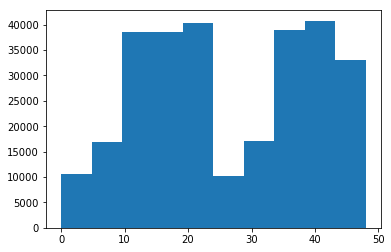

In [6]:
plt.show()

In [7]:
# The trend seems fair. There are lower number of transactions during the start of the day and transactions increase later on which seems reasonable.

In [8]:
sns.FacetGrid(data=credit_data[credit_data['Class']==1],col='Class').map(plt.hist,'Time_in_hours')

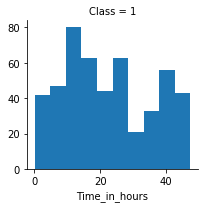

In [9]:
plt.show()

In [10]:
# There is no reasonable inference that can be made about the pattern of fraudulent transactions regarding time. We'll see whether to keep this variable or drop it. Lets see if Amount variable has some insights.

In [11]:
plt.figure(1)
plt.subplot(211)
plt.hist(data=credit_data[credit_data['Class']==0],x='Amount',label='Normal Transactions')
plt.legend(loc='best')
plt.subplot(212)
plt.hist(data=credit_data[credit_data['Class']==1],x='Amount',label='Fraud Transactions')
plt.legend(loc='best')

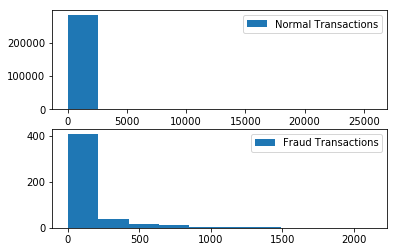

In [12]:
plt.show()

In [13]:
#Function to find in the correlation matrix the values which are of significant use for us.
def is_high(x):
    for i in range(len(x)):
        if (x.iloc[i]<0.5 and x.iloc[i]>-0.5):
            x.iloc[i]=0
    return x

In [14]:
a=credit_data.corr(method='spearman')
a=a.apply(is_high)
#To display the whole correlation matrix
pd.options.display.max_columns = 50
a

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Time_in_hours,Log_Amount
Time,1.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.0,0.000000
V1,0.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
V2,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,-0.502052,0.0,0.0,-0.502052
V3,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
V4,0.0,0.0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
V5,0.0,0.0,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
V6,0.0,0.0,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
V7,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
V8,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000
V9,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000


In [15]:
#To split the data into test and train dataset.
def split_data(dataset,ratio):
    sample=np.random.rand(len(dataset))<ratio
    return(dataset[sample],dataset[~sample])

In [16]:
col=list(credit_data.columns.values)

In [17]:
#Function to classify based on Naive Bayes. The algorithm runs 10 times and gives the mean of 
#predicted accuracy for each time.And it also tell which variable I removed from the total variable
#list so that I come to know which ones have to be removed.
def NB_Classify(ratio,drop_var):
    print('You dropped:',drop_var)
    #print (train.groupby('Class').count()['V1'])
    #print (test.groupby('Class').count()['V1'])
    pred_acc=[]
    for i in range(10):
        train,test=split_data(credit_data,ratio)
        clf=GaussianNB()
        clf.fit(train.drop(drop_var,axis=1),train['Class'])
        pred=clf.predict(test.drop(drop_var,axis=1))
        #print(pd.crosstab(test['Class'],pred))
        #print('You dropped:',drop_var)
        #print(accuracy_score(test['Class'],pred))
        pred_acc.append([pd.crosstab(test['Class'],pred).iloc[1,1]/(pd.crosstab(test['Class'],pred).iloc[1,0]+pd.crosstab(test['Class'],pred).iloc[1,1])])
    #' and got an accuracy of: ',np.mean(pred_acc)) 
    print(np.mean(pred_acc))

In [18]:
for var in col:
    NB_Classify(0.6,['Class','Log_Amount',var])

You dropped: ['Class', 'Log_Amount', 'Time']
0.830852711447
You dropped: ['Class', 'Log_Amount', 'V1']
0.649877328811
You dropped: ['Class', 'Log_Amount', 'V2']
0.648331109515
You dropped: ['Class', 'Log_Amount', 'V3']
0.619905093648
You dropped: ['Class', 'Log_Amount', 'V4']
0.631923049822
You dropped: ['Class', 'Log_Amount', 'V5']
0.662794858891
You dropped: ['Class', 'Log_Amount', 'V6']
0.631099183171
You dropped: ['Class', 'Log_Amount', 'V7']
0.653249989069
You dropped: ['Class', 'Log_Amount', 'V8']
0.642091178821
You dropped: ['Class', 'Log_Amount', 'V9']
0.634233421885
You dropped: ['Class', 'Log_Amount', 'V10']
0.63447602652
You dropped: ['Class', 'Log_Amount', 'V11']
0.636960655762
You dropped: ['Class', 'Log_Amount', 'V12']
0.629069067519
You dropped: ['Class', 'Log_Amount', 'V13']
0.634110221608
You dropped: ['Class', 'Log_Amount', 'V14']
0.596023079388
You dropped: ['Class', 'Log_Amount', 'V15']
0.642993729155
You dropped: ['Class', 'Log_Amount', 'V16']
0.643405372112
You dr

As it can be seen above time is not a good predictor in this case and this clearly supports our inference from the histograms that time had nothing to do with the fraud transactions. So on removing time from the list of predictors

In [19]:
NB_Classify(0.6,['Class','Time','Log_Amount'])

You dropped: ['Class', 'Time', 'Log_Amount']
0.827490435697
